In [1]:
import os
import fnmatch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import pandas as pd
from keras import layers
from keras.layers import Dense, Conv2D, Conv1D, Input, InputLayer
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.optimizers import RMSprop, Adam, SGD
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, AveragePooling2D, GlobalAveragePooling2D
from keras.models import Model, Sequential

# Load the images of Males, Females and Couples

In [3]:
train_img_path='C:/Users/Lenovo-pc/Python_practice/cv_images/train/'
test_img_path='C:/Users/Lenovo-pc/Python_practice/cv_images/test/'

# Load the labels associated with the images 0-Couple ,1-Actor, 2-Actress

In [4]:
train_labels=pd.read_excel(train_img_path+"train_labels.xlsx")
test_labels=pd.read_excel(test_img_path+"test_labels.xlsx")

# EDA

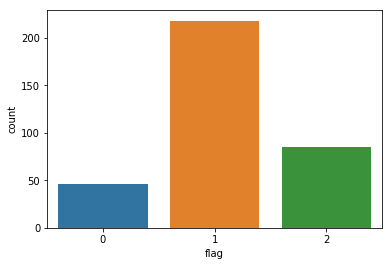

In [6]:
import seaborn as sns
%matplotlib inline
h=sns.countplot(train_labels['flag'])

#### There is a huge class imbalance in the traning set. The # of images for male is much more than the other 2 classes.

# Resize the train images to a standard size and get the pixel values

In [7]:
IMG_SIZE=224

In [8]:
X_train_files=[]
y_train=[]
for file in os.listdir(train_img_path):
    #print(file)
    if fnmatch.fnmatch(file, '*.jpg') or fnmatch.fnmatch(file, '*.jpeg'):
        filearr=cv2.resize(cv2.imread(train_img_path+file), (IMG_SIZE,IMG_SIZE), interpolation = cv2.INTER_AREA)
        X_train_files.append(np.array(filearr))
        for row in train_labels.iterrows():
            
            #print(file)
            #print(row[1][0])
            if row[1][0] == file:
                #print(row[1][0])
                y_train.append(row[1][1])        

In [9]:
len(X_train_files)

347

In [10]:
X_train_files[0].shape

(224, 224, 3)

len(y_train)

In [11]:
## There are 347 images in the training set

# Plot sample image

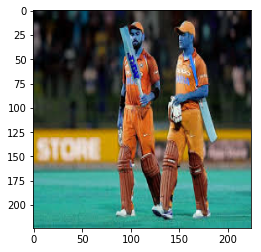

In [12]:
plt.imshow(X_train_files[15])

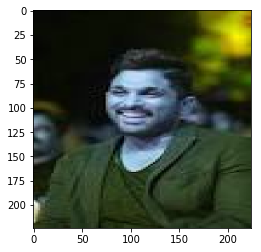

In [13]:
plt.imshow(X_train_files[76])

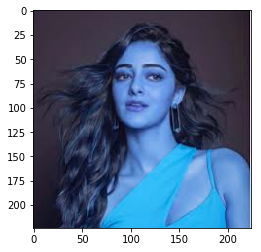

In [14]:
plt.imshow(X_train_files[105])

# Reshape the image data as per the input/output layer of the model

In [15]:
X_train=np.reshape(np.array(X_train_files),(len(X_train_files), IMG_SIZE,IMG_SIZE,3))

In [16]:
X_train.shape

(347, 224, 224, 3)

In [17]:
y_train=to_categorical(y_train)

In [18]:
len(y_train)

347

In [19]:
y_train=np.reshape(y_train,(len(X_train_files),3))

In [20]:
y_train[50]

array([0., 1., 0.], dtype=float32)

In [21]:
y_train.shape

(347, 3)

# Resize the test images to a sample size

In [22]:
X_test_files=[]
y_test=[]
for file in os.listdir(test_img_path):
    if fnmatch.fnmatch(file, '*.jpg'):
        filearr=cv2.resize(cv2.imread(test_img_path+file), (IMG_SIZE,IMG_SIZE), interpolation = cv2.INTER_AREA)
        X_test_files.append(np.array(filearr))
        for row in test_labels.iterrows():
            #print(row[0])
            #print(row[1][0])
            if row[1][0] == file:
                y_test.append(row[1][1]) 

In [23]:
len(y_test)

54

In [24]:
len(X_test_files)

54

# Reshape the test data as per input/output layer of the model

In [25]:
X_test=np.reshape(np.array(X_test_files),(len(y_test), IMG_SIZE,IMG_SIZE,3))

In [26]:
X_test.shape

(54, 224, 224, 3)

In [27]:
y_test=to_categorical(y_test)

In [28]:
y_test=np.reshape(y_test,(len(y_test),3))

In [29]:
y_test.shape

(54, 3)

In [30]:
model=Sequential()
model.add(Conv2D(64, (5,5), input_shape=(IMG_SIZE,IMG_SIZE,3), padding='same', activation='relu'))
model.add(Conv2D(48, (3,3), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu')) 
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Conv2D(8, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

W0310 07:45:24.296051  3416 deprecation_wrapper.py:119] From C:\Users\Lenovo-pc\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0310 07:45:25.763166  3416 deprecation_wrapper.py:119] From C:\Users\Lenovo-pc\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0310 07:45:27.127027  3416 deprecation_wrapper.py:119] From C:\Users\Lenovo-pc\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0310 07:45:28.271472  3416 deprecation_wrapper.py:119] From C:\Users\Lenovo-pc\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0310 07:45:29.060822  3416 deprecation_wrapper.py:119] From C:

In [32]:
opt = Adam()
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

W0310 07:45:42.286274  3416 deprecation.py:323] From C:\Users\Lenovo-pc\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      4864      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 222, 222, 48)      27696     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 220, 220, 32)      13856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 218, 218, 16)      4624      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 216, 216, 8)       1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 108, 108, 8)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 93312)             0         
__________

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
347/347 [==============================] - 237s 682ms/step - loss: 6.4842 - acc: 0.5898
Epoch 2/10
280/347 [=======================>......] - ETA: 42s - loss: 4.9062 - acc: 0.6929

In [60]:
model.evaluate(X_test, y_test)

54/54 [==============================] - 17s 319ms/step


[9.55146351567021, 0.4074074118225663]

# The validation accuracy is at 60% after 10 epochs.

In [502]:
model.save('men_women_couple_basic_cnn.h5')

# Image Augmentation (generation of more samples by flipping, rotating, zooming the images, etc)

In [35]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

Labels: [array([0., 1., 0.], dtype=float32), array([0., 1., 0.], dtype=float32), array([0., 1., 0.], dtype=float32), array([0., 1., 0.], dtype=float32), array([0., 1., 0.], dtype=float32)]


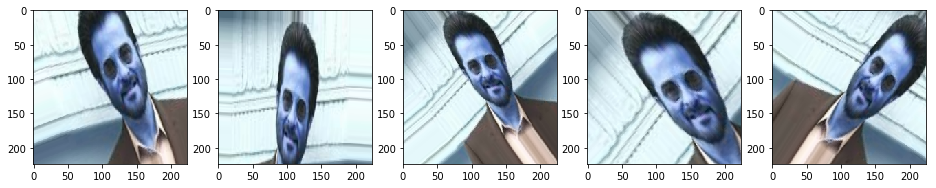

In [36]:
img_id = 50
img_generator = train_datagen.flow(X_train[img_id:img_id+1], y_train[img_id:img_id+1],
                                   batch_size=1)
img = [next(img_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in img])
l = [ax[i].imshow(img[i][0][0]) for i in range(0,5)]

In [37]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=5)
val_generator = val_datagen.flow(X_test, y_test, batch_size=5)

In [47]:
model=Sequential()
model.add(Conv2D(64, (5,5), input_shape=(IMG_SIZE,IMG_SIZE,3), padding='same', activation='relu'))
model.add(Conv2D(48, (3,3), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu')) 
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Conv2D(8, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [48]:
opt=Adam(lr=0.01, decay=0.01)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
history = model.fit_generator(train_generator, steps_per_epoch=5, epochs=10,
                              validation_data=val_generator, validation_steps=5, 
                              verbose=1)    

Epoch 1/10
5/5 [==============================] - 23s 5s/step - loss: 1.1347 - acc: 0.2800 - val_loss: 1.2326 - val_acc: 0.2400
Epoch 2/10
5/5 [==============================] - 20s 4s/step - loss: 1.2793 - acc: 0.3200 - val_loss: 1.1144 - val_acc: 0.2917
Epoch 3/10
5/5 [==============================] - 20s 4s/step - loss: 1.0932 - acc: 0.3200 - val_loss: 1.1120 - val_acc: 0.3200
Epoch 4/10
5/5 [==============================] - 18s 4s/step - loss: 1.0826 - acc: 0.4091 - val_loss: 1.2467 - val_acc: 0.4400
Epoch 5/10
5/5 [==============================] - 20s 4s/step - loss: 1.2229 - acc: 0.3600 - val_loss: 1.1622 - val_acc: 0.4583
Epoch 6/10
5/5 [==============================] - 20s 4s/step - loss: 1.1490 - acc: 0.2800 - val_loss: 1.0903 - val_acc: 0.4400
Epoch 7/10
5/5 [==============================] - 20s 4s/step - loss: 1.0912 - acc: 0.6000 - val_loss: 1.0976 - val_acc: 0.3750
Epoch 8/10
5/5 [==============================] - 20s 4s/step - loss: 1.0761 - acc: 0.6400 - val_loss: 1

# The validation accuracy has remained 67%

In [363]:
y_pred=model.predict(X_test[0:10])

In [364]:
y_pred

array([[8.3337396e-02, 5.9362912e-01, 5.2572584e-01],
       [2.9761034e-01, 5.2153647e-01, 4.6409324e-01],
       [2.1529967e-01, 6.9941592e-01, 6.4928949e-01],
       [8.1985295e-03, 1.7299998e-01, 1.2772024e-02],
       [2.5382698e-01, 4.6658087e-01, 2.4096775e-01],
       [6.8497658e-04, 5.5891842e-01, 2.0016527e-01],
       [2.0262599e-04, 7.6120073e-01, 7.1182555e-01],
       [1.1247271e-01, 7.1116573e-01, 7.5710750e-01],
       [3.2826371e-02, 3.8447064e-01, 3.1714851e-01],
       [3.8677938e-02, 5.6797355e-01, 3.7252301e-01]], dtype=float32)

In [372]:
np.argmax(y_pred[8])

1

In [365]:
y_test[0:10]

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [239]:
max(y_pred[3])

1.0

In [98]:
max(y_pred[1])

1.0

# Transfer Learning using VCG16

In [46]:
from keras.applications.vgg16 import VGG16
# load model
model = VGG16()
# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [70]:
# load model
model = VGG16(include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [64]:
for layer in model.layers[:5]:
    layer.trainable = False

In [65]:
# add new classifier layers
#flat1 = Flatten()(model.outputs)
#output = Dense(3, activation='softmax')(flat1)
# define new model
#model = Model(inputs=model.inputs, outputs=output)

x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(56, activation="relu")(x)
predictions = Dense(3, activation="softmax")(x)


In [66]:
model_final = Model(input = model.input, output = predictions)

C:\Users\Lenovo-pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [67]:
model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [68]:
model_final.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
model_final.fit(X_train, y_train, epochs=10, batch_size=20)

Epoch 1/10
192/192 [==============================] - 518s 3s/step - loss: 6.6023 - acc: 0.5694
Epoch 2/10
192/192 [==============================] - 462s 2s/step - loss: 6.2340 - acc: 0.6111
Epoch 3/10
192/192 [==============================] - 460s 2s/step - loss: 6.3453 - acc: 0.6042
Epoch 4/10
192/192 [==============================] - 461s 2s/step - loss: 5.6774 - acc: 0.6458
Epoch 5/10
192/192 [==============================] - 471s 2s/step - loss: 6.1227 - acc: 0.6181
Epoch 6/10
192/192 [==============================] - 460s 2s/step - loss: 5.8444 - acc: 0.6354
Epoch 7/10
192/192 [==============================] - 467s 2s/step - loss: 5.9557 - acc: 0.6285
Epoch 8/10
192/192 [==============================] - 475s 2s/step - loss: 6.5679 - acc: 0.5903
Epoch 9/10
192/192 [==============================] - 472s 2s/step - loss: 6.5679 - acc: 0.5903
Epoch 10/10
192/192 [==============================] - 469s 2s/step - loss: 6.2340 - acc: 0.6111


# 61% accuracy